# Performing Principal Component Analysis (PCA)

## Introduction

In this lesson, you'll code PCA from the ground up using NumPy. This should provide you with a deeper understanding of the algorithm and continue to practice your linear algebra skills.

## Objectives

You will be able to:

- Understand the steps required to perform PCA on a given dataset
- Understand and explain the role of Eigendecomposition in PCA


## Step 1: Get some data

To start, generate some data for PCA!

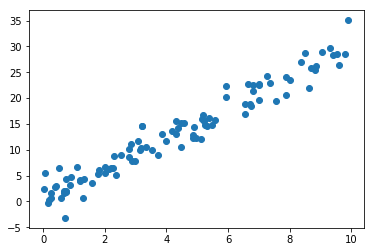

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.random.uniform(low=0, high=10, size=100)
x2 = [(xi*3)+np.random.normal(scale=2) for xi in x1]
plt.scatter(x1,x2);

## Step 2: Subtract the mean

Next, you have to subtract the mean from each dimension of the data. So, all the $x$ values
have $\bar{x}$ (the mean of the $x$ values of all the data points) subtracted, and all the $y$ values
have $\bar{y}$ subtracted from them. 

In [2]:
import pandas as pd

data = pd.DataFrame([x1,x2]).transpose()
data.columns = ['x1', 'x2']
data.head()

,x1,x2
0,3.192239,14.626883
1,3.163041,10.263251
2,4.468058,15.214206
3,7.021044,22.654695
4,2.772534,10.062445


In [3]:
data.mean()

x1     4.28691
x2    13.17138
dtype: float64

In [4]:
mean_centered = data - data.mean()
mean_centered.head()

,x1,x2
0,-1.094671,1.455503
1,-1.123870,-2.908128
2,0.181148,2.042826
3,2.734133,9.483315
4,-1.514377,-3.108935


## Step 3: Calculate the covariance matrix

Now that you have normalized your data, you must now calculate the covariance matrix.

In [5]:
cov = np.cov([mean_centered.x1, mean_centered.x2])
cov

array([[ 8.43881593, 24.71540643],
       [24.71540643, 76.5639737 ]])

## Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix

Now that you've calculated the covariance matrix, its time to compute the associated eigenvectors. These will form the new axes when its time to reproject the dataset on the new basis.

In [6]:
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector

array([[-0.95115302, -0.30871983],
       [ 0.30871983, -0.95115302]])

In [7]:
eigen_value

array([ 0.41683   , 84.58595962])

## Step 5: Choosing components and forming a feature vector

If you look at the eigenvectors and eigenvalues above, you can see that the eigenvalues have very different values. In fact, it turns out that **the eigenvector with the highest eigenvalue is the principal component of the data set.**


In general, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest. This gives us the components in order of significance. Typically, PCA will be used to reduce the dimensionality of the dataset and, as such, some of these eigenvectors will be subsequently discarded. In general, the smaller the eigenvalue relative to others, the less information encoded within said feature.

Finally, you need to form a __feature vector__, which is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors that you want to keep from the list of eigenvectors, and forming a matrix with these eigenvectors in the columns as shown below:

In [23]:
e_indices = np.argsort(eigen_value)[::-1] #Get the index values of the sorted eigenvalues
eigenvectors_sorted = eigen_vector[:,e_indices]
eigenvectors_sorted

array([[-0.30280656, -0.95305204],
       [-0.95305204,  0.30280656]])

## Step 5: Deriving the new data set

This the final step in PCA, and is also the easiest. Once you have chosen the components (eigenvectors) that you wish to keep in our data and formed a feature vector, you simply take the transpose of the vector and multiply it on the left of the original data set, transposed.

In [24]:
transformed = eigenvectors_sorted.dot(mean_centered.T).T
transformed[:5]

array([[ 14.4593493 ,  -0.91853819],
       [  3.79202935,  -0.62214167],
       [-16.00632588,   0.52278351],
       [-15.82576429,  -0.59379253],
       [-12.0947357 ,   0.05398833]])

## Summary 

That's it! You just coded PCA on your own using NumPy! In the next lab, you'll continue to practice this on your own!